In [1]:
import numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

from sklearn.model_selection import StratifiedKFold

from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN 
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score  
from sklearn.metrics import classification_report,confusion_matrix

Using TensorFlow backend.


In [106]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [107]:
# load dataset
dataset = pd.read_csv("data/3SEP - Sheet1.csv")


In [108]:
dataset.columns

Index(['Aggregated_RTT_AVG', 'Aggregated_RTT_stdev', 'RTT_avg', 'RTT_stdev',
       'Duplicate_acks', 'Triple_dupacks', 'Max_retrans', 'Min_retr_time',
       'Max_retr_time', 'Avg_retr_time', 'Sdv_retr_time', 'Outoforder_pkts',
       'Experience', 'Resolutions', 'Total_Stall_Events', 'Avg_Bit_Rate',
       'Min_Rate', 'Max_Rate', 'Shifts_Quality', '320x240', '384x288',
       '512x384', '512x384.1', '640x480', '720x480', '1280x720', '1280x720.1',
       '1920x1080', '1920x1080.1', 'Avg_stall', 'Min_stall', 'Max_tall',
       'Total_Stalls', 'Segments_High_or_Low_Resolutions', 'Segments_in_Low',
       'Segments_in_High', 'lresolutionsbystall', 'Bandwidth', 'Packetloss',
       'Hosts_Competitions', 'MPD', 'Total_Packets', 'Througput',
       'RTT_Samples'],
      dtype='object')

In [109]:
dataset = dataset[(dataset['Experience'] != 'remove')]

In [110]:
dataset.shape

(728, 44)

In [111]:
#dataset = dataset[(dataset['Hosts_Competitions']=='Low')]

In [112]:
dataset.head()

,Aggregated_RTT_AVG,Aggregated_RTT_stdev,RTT_avg,RTT_stdev,Duplicate_acks,Triple_dupacks,Max_retrans,Min_retr_time,Max_retr_time,Avg_retr_time,...,Segments_in_Low,Segments_in_High,lresolutionsbystall,Bandwidth,Packetloss,Hosts_Competitions,MPD,Total_Packets,Througput,RTT_Samples
0,0.16,1.82,0.1,1.6,1,0,0,0,0,0,...,2,43,Stall_in_Stream,High,No,Low,BIG_BUCK_BUNNY,17778,778213,15428
1,0.16,1.82,0.1,1.7,1,0,0,0,0,0,...,2,43,Stall_in_Stream,High,No,Low,BIG_BUCK_BUNNY,22507,779871,19312
2,0.10,1.60,0.1,1.7,1,0,0,0,0,0,...,2,45,Stall_in_Stream,High,No,Low,High_Resolutions_Scenes,22910,713700,19980
3,0.10,1.60,0.1,1.5,1,0,0,0,0,0,...,2,45,Stall_in_Stream,High,No,Low,High_Resolutions_Scenes,21675,713665,19016
4,0.10,1.60,0.1,1.5,1,0,0,0,0,0,...,2,45,Stall_in_Stream,High,No,Low,High_Resolutions_Scenes,22008,713593,19331


In [113]:
#y_pred = (y_pred > 0.5) 

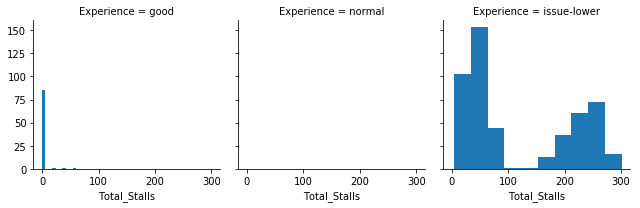

In [114]:
g = sns.FacetGrid(data=dataset,col='Experience')
g.map(plt.hist,'Total_Stalls')

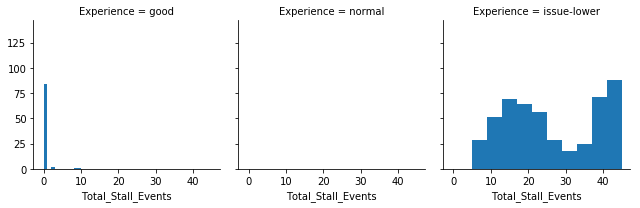

In [115]:
g = sns.FacetGrid(data=dataset,col='Experience')
g.map(plt.hist,'Total_Stall_Events')

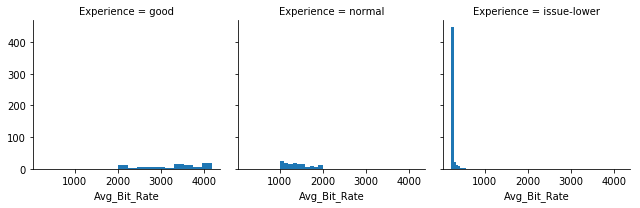

In [116]:
g = sns.FacetGrid(data=dataset,col='Experience')
g.map(plt.hist,'Avg_Bit_Rate')

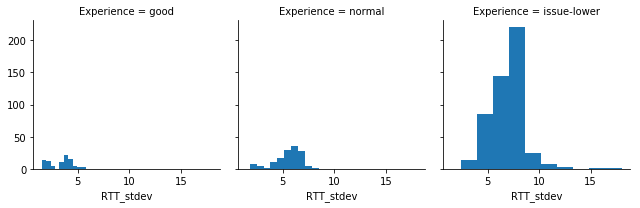

In [117]:
g = sns.FacetGrid(data=dataset,col='Experience')
g.map(plt.hist,'RTT_stdev')

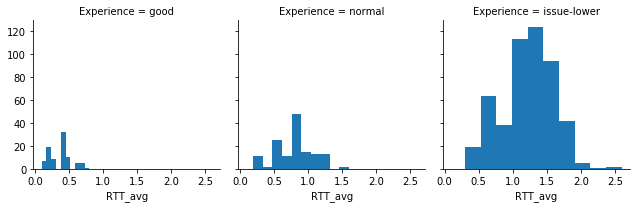

In [118]:
g = sns.FacetGrid(data=dataset,col='Experience')
g.map(plt.hist,'RTT_avg')

In [119]:
myP = ["#c26b00", "#242526", "#82096e", "#103009", "#34495e", "#c26b00", "#c2a200", "#0015b8", "#78282a", "#fc030b"]


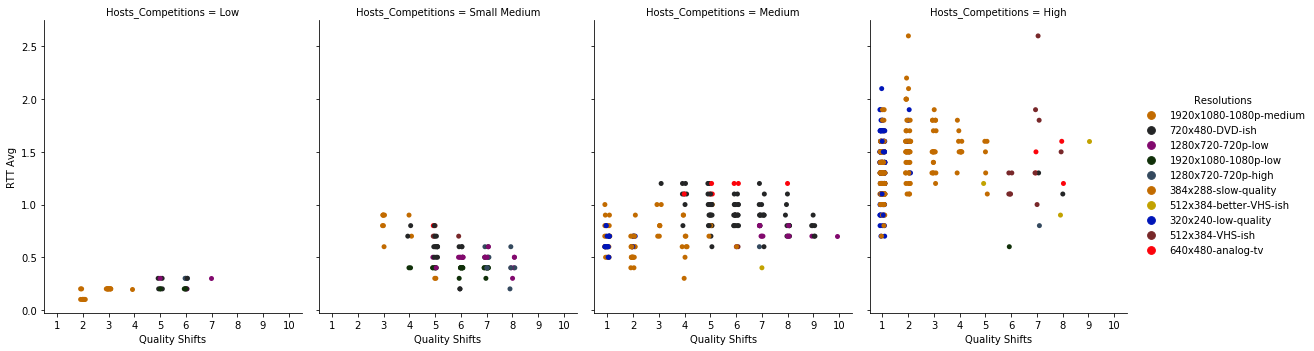

In [120]:
g = sns.catplot(x="Shifts_Quality", y="RTT_avg", col="Hosts_Competitions",palette=myP, data=dataset, hue='Resolutions', height=5, aspect=.8)
g.set_axis_labels("Quality Shifts", "RTT Avg")

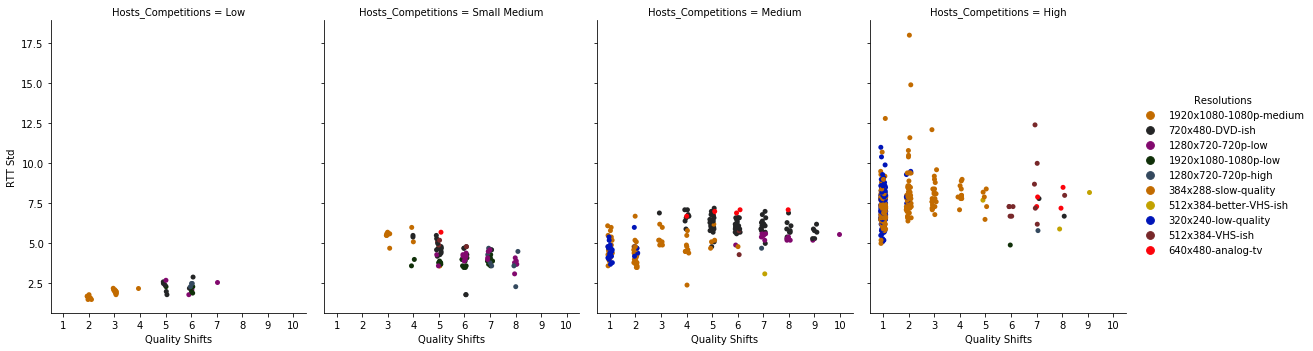

In [121]:
g = sns.catplot(x="Shifts_Quality", y="RTT_stdev", col="Hosts_Competitions",palette=myP, data=dataset,hue='Resolutions', height=5, aspect=.8)
g.set_axis_labels("Quality Shifts", "RTT Std")

In [122]:
#dataset['RTT_stdev'] = dataset['RTT_stdev'].astype(np.int64)

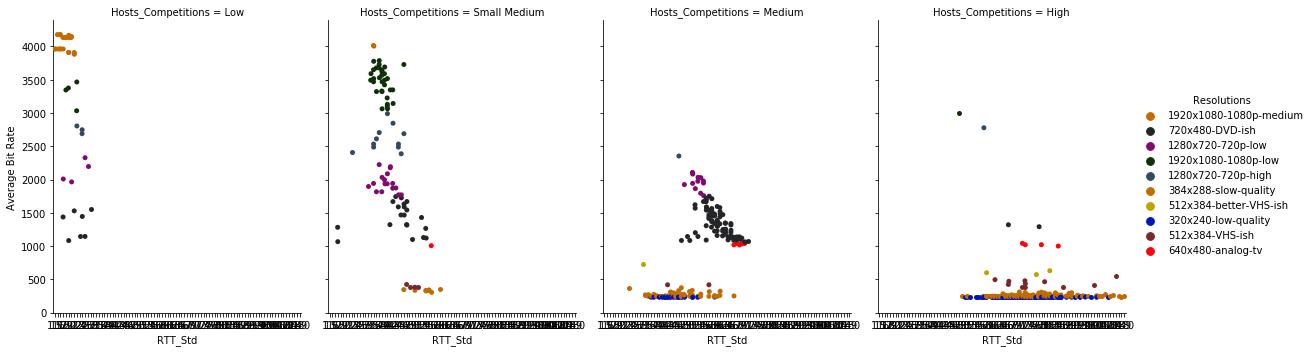

In [123]:
g = sns.catplot(x="RTT_stdev", y="Avg_Bit_Rate", col="Hosts_Competitions", palette=myP,data=dataset, height=5, aspect=.8,hue="Resolutions")
g.set_axis_labels("RTT_Std", "Average Bit Rate")

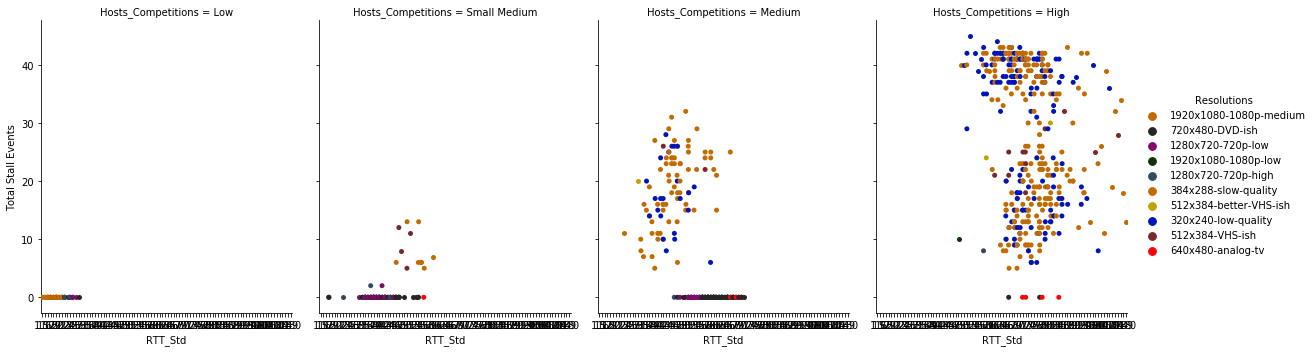

In [124]:
g = sns.catplot(x="RTT_stdev", y="Total_Stall_Events",col="Hosts_Competitions", palette=myP,data=dataset, hue="Resolutions", height=5, aspect=.8)
g.set_axis_labels("RTT_Std", "Total Stall Events")

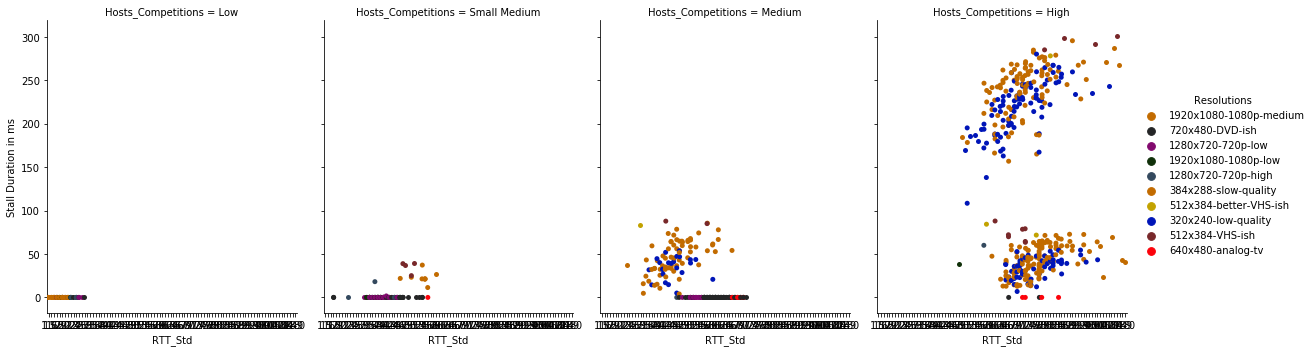

In [125]:
g = sns.catplot(x="RTT_stdev", y="Total_Stalls", hue="Resolutions",col="Hosts_Competitions",palette=myP,data=dataset, height=5, aspect=.8)
g.set_axis_labels("RTT_Std", "Stall Duration in ms")

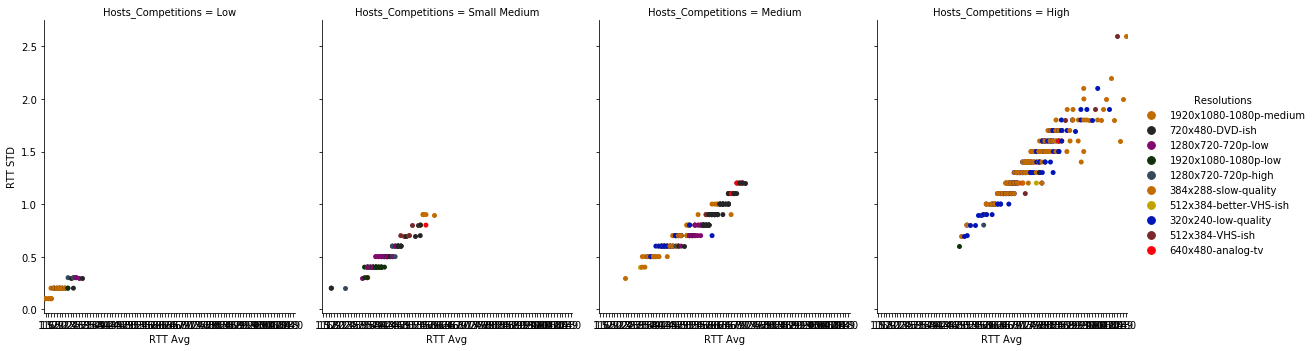

In [126]:
g = sns.catplot(x="RTT_stdev", y="RTT_avg",col="Hosts_Competitions", hue="Resolutions",palette=myP, data=dataset, height=5, aspect=.8)
g.set_axis_labels("RTT Avg", "RTT STD")

In [127]:
#dataset1 = pd.read_csv("data/30AUG.csv")

In [128]:

#X = dataset[['RTT_avg', 'RTT_stdev', 'Triple_dupacks','Max_retrans','Min_retr_time','Max_retr_time','Avg_retr_time','Sdv_retr_time','Outoforder_pkts']]
#Y = dataset['Labels']

In [129]:
target_count = dataset.Experience.value_counts()
#print('Class 0:', target_count[0])
#print('Class 1:', target_count[1])

target_count

issue-lower    500
normal         140
good            88
Name: Experience, dtype: int64

In [130]:
#dataset = dataframe.values
X = dataset.iloc[:,2:12].values


In [131]:
X

array([[ 0.1,  1.6,  1. , ...,  0. ,  0. ,  0. ],
       [ 0.1,  1.7,  1. , ...,  0. ,  0. ,  0. ],
       [ 0.1,  1.7,  1. , ...,  0. ,  0. ,  0. ],
       ...,
       [ 2.2, 11.6,  0. , ...,  0. ,  0. ,  0. ],
       [ 2.6, 18. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 2.6, 12.4,  0. , ...,  0. ,  0. ,  0. ]])

In [132]:
Y = dataset.iloc[:,12].values

In [133]:
Y

array(['good', 'good', 'good', 'good', 'good', 'good', 'good', 'normal',
       'normal', 'normal', 'normal', 'normal', 'good', 'normal', 'normal',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'normal', 'normal', 'good', 'good', 'issue-lower',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'normal',
       'normal', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'issue-lower', 'good', 'good', 'good', 'good', 'good',
       'issue-lower', 'issue-lower', 'good', 'good', 'good', 'normal',
       'good', 'normal', 'good', 'good', 'issue-lower', 'good', 'good',
       'good', 'issue-lower', 'issue-lower', 'issue-lower', 'good',
       'issue-lower', 'issue-lower', 'issue-lower', 'issue-lower',
       '

In [134]:
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
Y = np_utils.to_categorical(encoded_Y)

In [135]:
Y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

acc: 73.97%
Train: 0.771, Test: 0.740


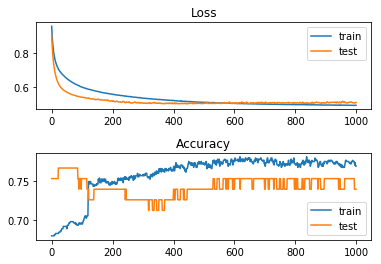

acc: 79.45%
Train: 0.820, Test: 0.795


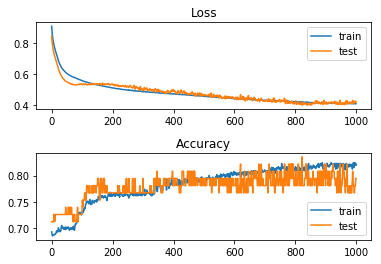

acc: 83.56%
Train: 0.821, Test: 0.836


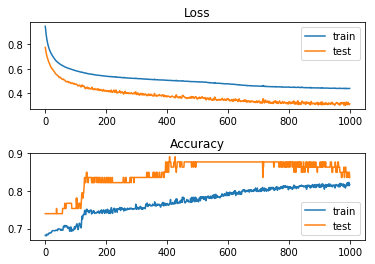

acc: 83.56%
Train: 0.786, Test: 0.836


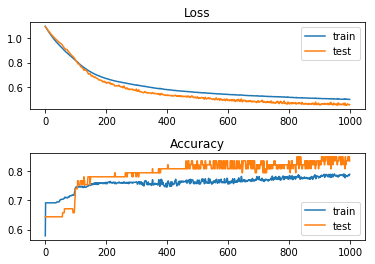

acc: 65.75%
Train: 0.817, Test: 0.658


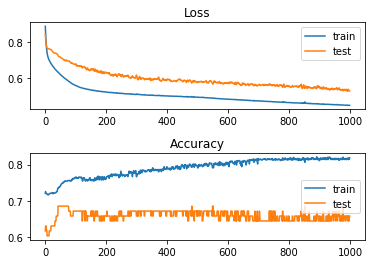

acc: 76.71%
Train: 0.788, Test: 0.767


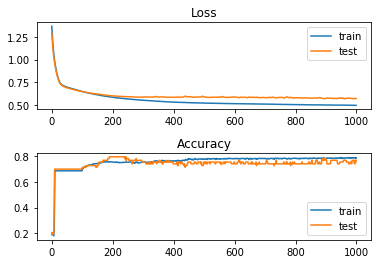

acc: 83.56%
Train: 0.818, Test: 0.836


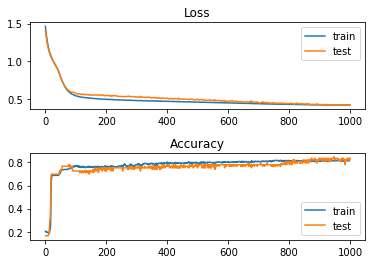

acc: 69.86%
Train: 0.786, Test: 0.699


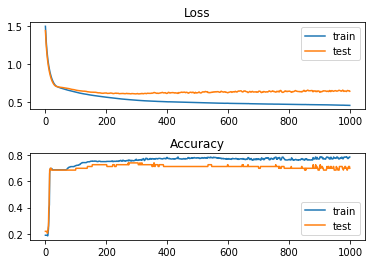

In [ ]:
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
#kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
cvscores = []
for train, test in kfold.split(X, Y):
  # create model
	model = Sequential()
	model.add(Dense(5, input_dim=10, activation='relu'))
	model.add(Dense(5, activation='relu'))
	model.add(Dense(3, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	# Fit the model
	history = model.fit(X[train], Y[train],validation_data=(X[test], Y[test]), epochs=1000, batch_size=128, verbose=0)
	# evaluate the model
	scores = model.evaluate(X[test], Y[test], verbose=2)
	print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
	cvscores.append(scores[1] * 100)
	_, train_acc = model.evaluate(X[train], Y[train], verbose=2)
	_, test_acc = model.evaluate(X[test], Y[test], verbose=2)
	print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
	plt.subplots_adjust(hspace=0.5)
# plot loss during training
	plt.subplot(211)
	plt.title('Loss')
	plt.plot(history.history['loss'], label='train')
	plt.plot(history.history['val_loss'], label='test')
	plt.legend()
# plot accuracy during training
	plt.subplot(212)
	plt.title('Accuracy')
	plt.plot(history.history['acc'], label='train')
	plt.plot(history.history['val_acc'], label='test')
	plt.legend()
	plt.show()
print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))

In [ ]:
print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))

In [ ]:
y_pred = model.predict(X[test])

In [ ]:
#y_pred = (y_pred > 0.5) 

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y[test].argmax(axis=1), y_pred.argmax(axis=1))

In [ ]:
cm

In [ ]:
print(classification_report(Y[test].argmax(axis=1),y_pred.argmax(axis=1)))

In [ ]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__) # requires version >= 1.9.0

In [ ]:
import cufflinks as cf

In [ ]:
# For Notebooks
init_notebook_mode(connected=True)

In [ ]:
# For offline use
cf.go_offline()

In [105]:
dataset.iplot()